In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize']=10,7

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving test_sales.csv to test_sales.csv
Saving train_sales.csv to train_sales.csv


In [ ]:
import io
train_df=pd.read_csv(io.BytesIO(uploaded['train_sales.csv']))

In [ ]:
import io
test_df=pd.read_csv(io.BytesIO(uploaded['test_sales.csv']))

In [ ]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
sale_df=pd.concat([train_df,test_df])
sale_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [ ]:
grp1=sale_df.groupby(['Outlet_Identifier'])
grp1['Outlet_Size','Outlet_Location_Type','Outlet_Type'].first()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Outlet_Size,Outlet_Location_Type,Outlet_Type
Outlet_Identifier,,,
OUT010,NaN,Tier 3,Grocery Store
OUT013,High,Tier 3,Supermarket Type1
OUT017,NaN,Tier 2,Supermarket Type1
OUT018,Medium,Tier 3,Supermarket Type2
OUT019,Small,Tier 1,Grocery Store
OUT027,Medium,Tier 3,Supermarket Type3
OUT035,Small,Tier 2,Supermarket Type1
OUT045,NaN,Tier 2,Supermarket Type1
OUT046,Small,Tier 1,Supermarket Type1


In [ ]:
pd.crosstab(sale_df['Outlet_Size'],sale_df['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,1553
Medium,1550,0,3105
Small,2430,1550,0


In [ ]:
pd.crosstab(sale_df['Outlet_Size'],sale_df['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,1553,0,0
Medium,0,1550,1546,1559
Small,880,3100,0,0


In [ ]:
#pd.crosstab(sale_df['Outlet_Location_Type'],sale_df['Outlet_Type'])

In [ ]:
sale_df.loc[sale_df['Outlet_Type']=='Grocery Store','Outlet_Size']='Small'

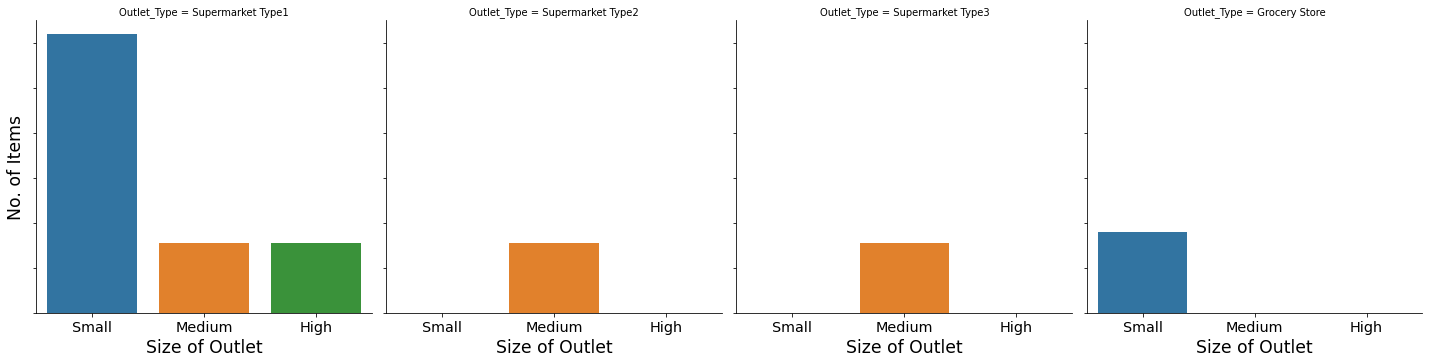

In [ ]:
p=sns.catplot(x='Outlet_Size', col='Outlet_Type', kind='count',col_order=['Supermarket Type1','Supermarket Type2','Supermarket Type3','Grocery Store'], order=['Small', 'Medium', 'High'], data=sale_df)
p.set_xticklabels(fontsize='x-large')
p.set_yticklabels(fontsize='x-large')
p.set_xlabels(label='Size of Outlet', fontsize='xx-large')
p.set_ylabels(label='No. of Items', fontsize='xx-large')
plt.show()

In [ ]:
sale_df.loc[sale_df['Outlet_Location_Type']=='Tier 2','Outlet_Size']='Small'

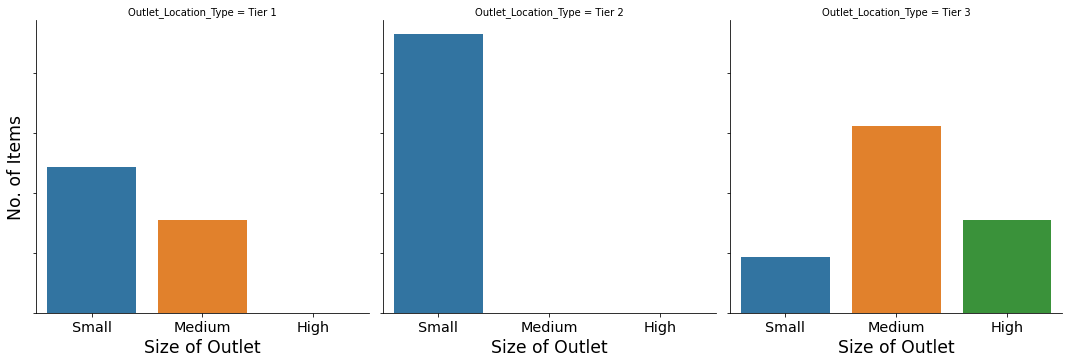

In [ ]:
p=sns.catplot(x='Outlet_Size', col='Outlet_Location_Type', kind='count', col_order=['Tier 1','Tier 2','Tier 3'], order=['Small', 'Medium', 'High'], data=sale_df)
p.set_xticklabels(fontsize='x-large')
p.set_yticklabels(fontsize='x-large')
p.set_xlabels(label='Size of Outlet', fontsize='xx-large')
p.set_ylabels(label='No. of Items', fontsize='xx-large')
plt.show()

In [ ]:
sale_df['Outlet_Size'].value_counts()

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

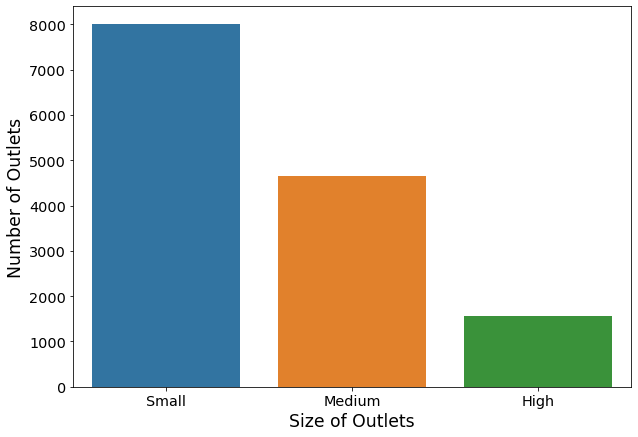

In [ ]:
sns.countplot(x='Outlet_Size', order=['Small', 'Medium', 'High'], data=sale_df)
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xlabel(xlabel='Size of Outlets', fontsize='xx-large')
plt.ylabel(ylabel='Number of Outlets', fontsize='xx-large')
plt.show()

In [ ]:
sale_df['Outlet_Size'].isna().sum()

0

In [ ]:
sale_df['Item_Identifier'].value_counts()

FDA13    10
FDE36    10
DRD15    10
FDY02    10
NCK05    10
         ..
FDH58     7
FDM52     7
FDM10     7
NCW54     7
FDO33     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
sale_df[sale_df['Item_Identifier']=='FDR14']['Item_Weight']

956     11.65
5150      NaN
5738      NaN
5907    11.65
8266    11.65
46      11.65
987     11.65
1399    11.65
1965    11.65
2112    11.65
Name: Item_Weight, dtype: float64

In [ ]:
sale_df['Item_Weight']=sale_df['Item_Weight'].fillna(sale_df.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [ ]:
sale_df[sale_df['Item_Identifier']=='FDR14']['Item_Weight']

956     11.65
5150    11.65
5738    11.65
5907    11.65
8266    11.65
46      11.65
987     11.65
1399    11.65
1965    11.65
2112    11.65
Name: Item_Weight, dtype: float64

In [ ]:
sale_df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [ ]:
sale_df['Item_Visibility']=sale_df['Item_Visibility'].replace(to_replace=0,value=sale_df['Item_Visibility'].median())

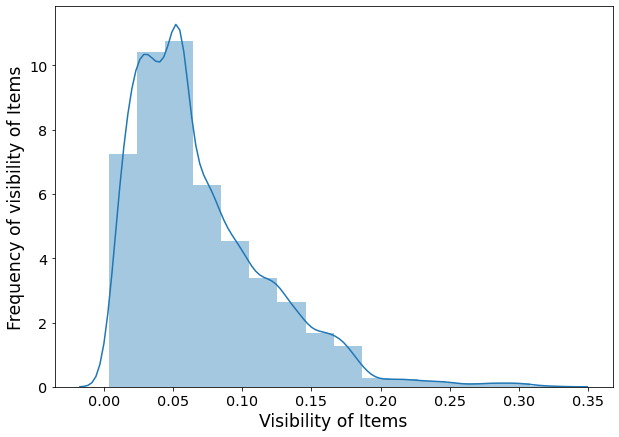

In [ ]:
sns.distplot(sale_df['Item_Visibility'],bins=sale_df['Item_Type'].nunique())
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xlabel(xlabel='Visibility of Items', fontsize='xx-large')
plt.ylabel(ylabel='Frequency of visibility of Items', fontsize='xx-large')
plt.show()

In [ ]:
sale_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
sale_df['Item_Fat_Content']=sale_df['Item_Fat_Content'].replace(to_replace='low fat',value='Low Fat')
sale_df['Item_Fat_Content']=sale_df['Item_Fat_Content'].replace(to_replace='LF',value='Low Fat')
sale_df['Item_Fat_Content']=sale_df['Item_Fat_Content'].replace(to_replace='reg',value='Regular')

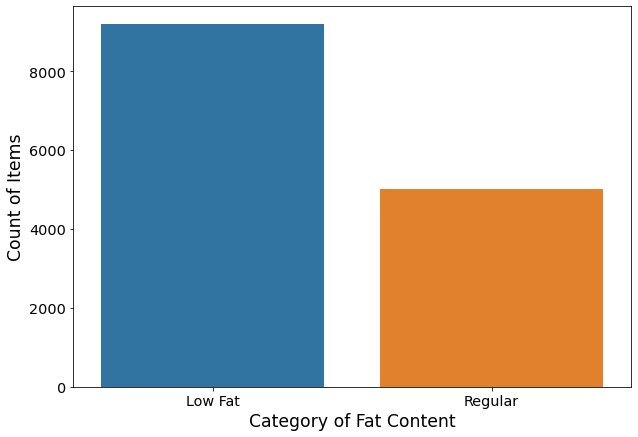

In [ ]:
sns.countplot(x='Item_Fat_Content',data=sale_df)
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xlabel(xlabel='Category of Fat Content', fontsize='xx-large')
plt.ylabel(ylabel='Count of Items', fontsize='xx-large')
plt.show()

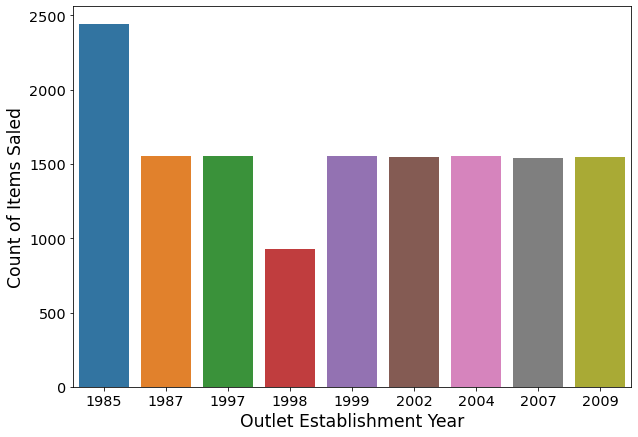

In [ ]:
sns.countplot(x='Outlet_Establishment_Year',data=sale_df)
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xlabel(xlabel='Outlet Establishment Year', fontsize='xx-large')
plt.ylabel(ylabel='Count of Items Saled', fontsize='xx-large')
plt.show()

In [ ]:
arr_2013=np.ones(sale_df['Outlet_Establishment_Year'].shape,dtype='int')*2013
arr_2013

array([2013, 2013, 2013, ..., 2013, 2013, 2013])

In [ ]:
arr_2013=arr_2013.reshape(-1,1)

In [ ]:
arr_2013

array([[2013],
       [2013],
       [2013],
       ...,
       [2013],
       [2013],
       [2013]])

In [ ]:
sale_df['Outlet_Establishment_Year'].iloc[3]

1998

In [ ]:
lst=[]
for i in range(sale_df['Outlet_Establishment_Year'].shape[0]):
    req_val=arr_2013[i][0]-sale_df['Outlet_Establishment_Year'].iloc[i]
    lst.append(req_val)

In [ ]:
req_diff=np.array(lst)
req_diff

array([14,  4, 14, ..., 11,  6, 11])

In [ ]:
sale_df['Time_Diff']=pd.DataFrame(req_diff)
sale_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Time_Diff
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.054021,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.054021,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [ ]:
sale_df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

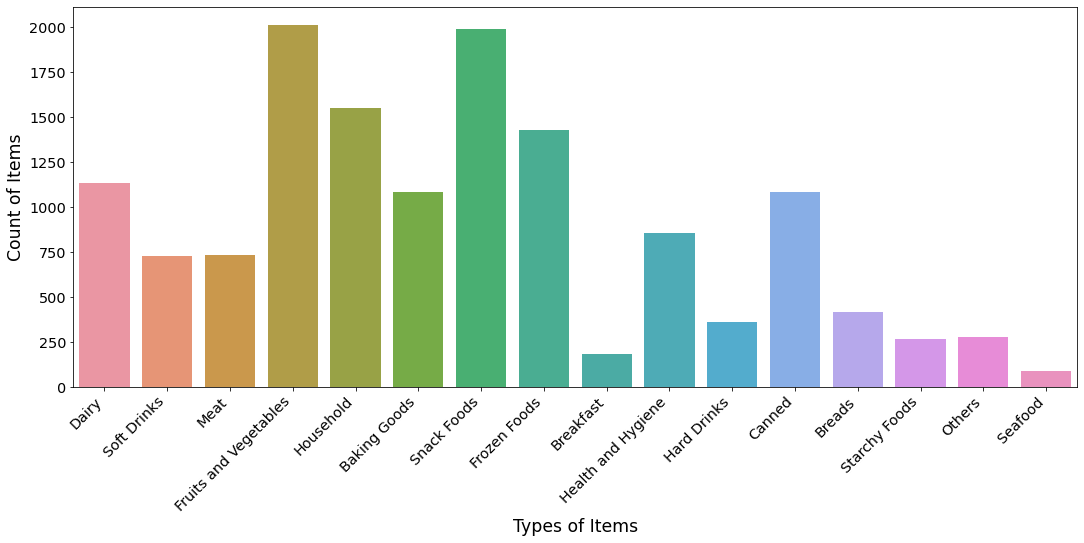

In [ ]:
rcParams['figure.figsize']=18,7
sns.countplot(x='Item_Type',data=sale_df)
plt.xticks(rotation=45,horizontalalignment='right',fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xlabel(xlabel='Types of Items', fontsize='xx-large')
plt.ylabel(ylabel='Count of Items', fontsize='xx-large')
plt.show()

In [ ]:
sale_df['Item_Identifier']=sale_df['Item_Identifier'].str[:2]
sale_df['Item_Identifier'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [ ]:
sale_df['Item_Identifier']=sale_df['Item_Identifier'].replace(['FD','DR', 'NC'], ['Eatables', 'Drinks', 'Non-Consumable'])
sale_df['Item_Identifier'].value_counts()

Eatables          10201
Non-Consumable     2686
Drinks             1317
Name: Item_Identifier, dtype: int64

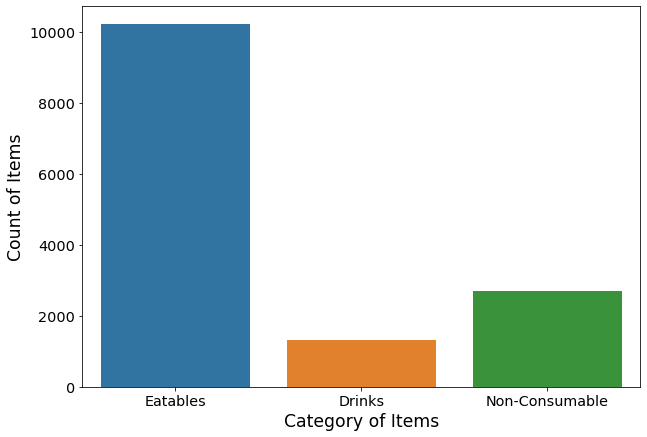

In [ ]:
rcParams['figure.figsize']=10,7
sns.countplot(x='Item_Identifier',data=sale_df)
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xlabel(xlabel='Category of Items', fontsize='xx-large')
plt.ylabel(ylabel='Count of Items', fontsize='xx-large')
plt.show()

In [ ]:
temp=sale_df.groupby(['Item_Identifier','Item_Type'])['Item_Identifier','Item_Type'].count()
temp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Item_Identifier  Item_Type
Item_Identifier Item_Type                                        
Drinks          Dairy                              229        229
                Hard Drinks                        362        362
                Soft Drinks                        726        726
Eatables        Baking Goods                      1086       1086
                Breads                             416        416
                Breakfast                          186        186
                Canned                            1084       1084
                Dairy                              907        907
                Frozen Foods                      1426       1426
                Fruits and Vegetables             2013       2013
                Meat                               736        736
                Seafood                             89         89
                Snack Foods                       1989       1989
                Starchy Foods                      269        269
Non-Consumable  Health and Hygiene                 858        858
                Household                         1548       1548
                Others                             280        280

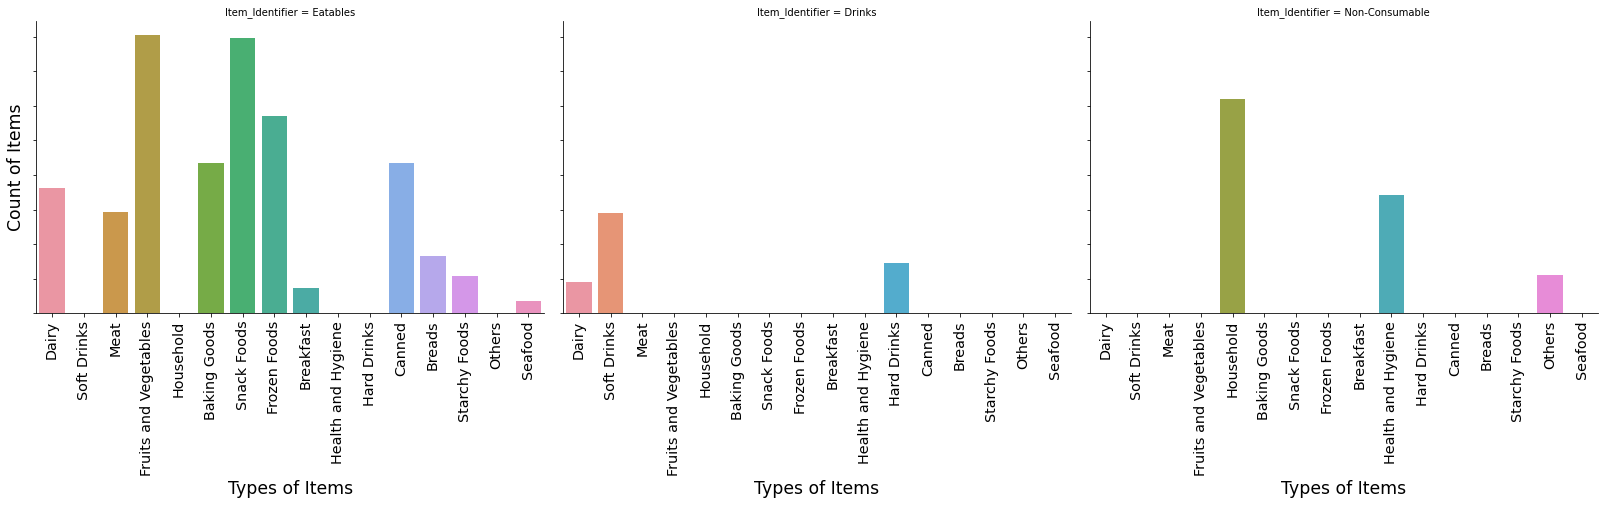

In [ ]:
p=sns.catplot(x='Item_Type', col='Item_Identifier', kind='count', data=sale_df, aspect=1.5, col_order=['Eatables', 'Drinks', 'Non-Consumable'])
p.set_xticklabels(rotation=90,fontsize='x-large')
p.set_yticklabels(fontsize='x-large')
p.set_xlabels(label='Types of Items', fontsize='xx-large')
p.set_ylabels(label='Count of Items', fontsize='xx-large')
plt.show()

In [ ]:
cols=sale_df.columns
cols

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Time_Diff'],
      dtype='object')

In [ ]:
encd_sale=pd.get_dummies(data=sale_df, columns=['Item_Identifier','Item_Fat_Content','Item_Type'])

In [ ]:
encd_sale=encd_sale.drop(['Outlet_Identifier','Outlet_Establishment_Year'],1)
encd_sale.tail()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Time_Diff,Item_Identifier_Drinks,Item_Identifier_Eatables,Item_Identifier_Non-Consumable,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
5676,10.5,0.013496,141.3154,Small,Tier 1,Supermarket Type1,NaN,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5677,7.6,0.142991,169.1448,Medium,Tier 3,Supermarket Type2,NaN,26,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5678,10.0,0.073529,118.7440,Small,Tier 2,Supermarket Type1,NaN,6,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5679,15.3,0.054021,214.6218,Small,Tier 2,Supermarket Type1,NaN,28,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5680,9.5,0.104720,79.7960,Small,Tier 2,Supermarket Type1,NaN,26,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
encd_sale['Outlet_Size']=le.fit_transform(encd_sale['Outlet_Size'])
encd_sale['Outlet_Location_Type']=le.fit_transform(encd_sale['Outlet_Location_Type'])
encd_sale['Outlet_Type']=le.fit_transform(encd_sale['Outlet_Type'])

In [ ]:
encd_sale.tail()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Time_Diff,Item_Identifier_Drinks,Item_Identifier_Eatables,Item_Identifier_Non-Consumable,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
5676,10.5,0.013496,141.3154,2,0,1,NaN,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5677,7.6,0.142991,169.1448,1,2,2,NaN,26,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5678,10.0,0.073529,118.7440,2,1,1,NaN,6,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5679,15.3,0.054021,214.6218,2,1,1,NaN,28,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5680,9.5,0.104720,79.7960,2,1,1,NaN,26,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(train_df.shape,test_df.shape)

(8523, 12) (5681, 11)


In [ ]:
org_train=encd_sale.iloc[:8523,:]

In [ ]:
org_test=encd_sale.iloc[8523:,:]

In [ ]:
print(org_train.shape,org_test.shape)

(8523, 29) (5681, 29)


In [ ]:
X_train=org_train.drop(['Item_Outlet_Sales'],1)
y_train=org_train[['Item_Outlet_Sales']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
#y_train=scaler.fit_transform(y_train)

In [ ]:
X_test=org_test.drop(['Item_Outlet_Sales'],1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_test=scaler.fit_transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
X_train1=pca.fit_transform(X_train)
X_test1=pca.transform(X_test)

In [ ]:
#pca.explained_variance_ratio_

In [ ]:
# from sklearn.decomposition import PCA
# pca=PCA(n_components=2)
# X_train1=pca.fit_transform(X_train)
# X_test1=pca.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train1,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.score(X_train1,y_train)

0.5020009848848493

**VARIANCE AND CORRELATION**

In [ ]:
encd_sale=encd_sale.iloc[:,:13]
encd_sale

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Time_Diff,Item_Identifier_Drinks,Item_Identifier_Eatables,Item_Identifier_Non-Consumable,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,9.30,0.016047,249.8092,1,0,1,3735.1380,14,0,1,0,1,0
1,5.92,0.019278,48.2692,1,2,2,443.4228,4,1,0,0,0,1
2,17.50,0.016760,141.6180,1,0,1,2097.2700,14,0,1,0,1,0
3,19.20,0.054021,182.0950,2,2,0,732.3800,15,0,1,0,0,1
4,8.93,0.054021,53.8614,0,2,1,994.7052,26,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.50,0.013496,141.3154,2,0,1,NaN,4,0,1,0,0,1
5677,7.60,0.142991,169.1448,1,2,2,NaN,26,0,1,0,0,1
5678,10.00,0.073529,118.7440,2,1,1,NaN,6,0,0,1,1,0
5679,15.30,0.054021,214.6218,2,1,1,NaN,28,0,1,0,0,1


In [ ]:
org_train=encd_sale.iloc[:8523,:]

In [ ]:
org_test=encd_sale.iloc[8523:,:]

In [ ]:
org_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Time_Diff,Item_Identifier_Drinks,Item_Identifier_Eatables,Item_Identifier_Non-Consumable,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,9.30,0.016047,249.8092,1,0,1,3735.1380,14,0,1,0,1,0
1,5.92,0.019278,48.2692,1,2,2,443.4228,4,1,0,0,0,1
2,17.50,0.016760,141.6180,1,0,1,2097.2700,14,0,1,0,1,0
3,19.20,0.054021,182.0950,2,2,0,732.3800,15,0,1,0,0,1
4,8.93,0.054021,53.8614,0,2,1,994.7052,26,0,0,1,1,0


In [ ]:
X_train=org_train.drop(['Item_Outlet_Sales'],1)
y_train=org_train[['Item_Outlet_Sales']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm_train=pd.DataFrame()
scaler=MinMaxScaler()
col=org_train.columns.drop('Item_Outlet_Sales',1)
scaled_values=scaler.fit_transform(org_train[col])
for i in range(len(col)):
    norm_train[col[i]]=scaled_values[:,i]
norm_train['Item_Outlet_Sales']=org_train['Item_Outlet_Sales']
norm_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Time_Diff,Item_Identifier_Drinks,Item_Identifier_Eatables,Item_Identifier_Non-Consumable,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Outlet_Sales
0,0.282525,0.038399,0.927507,0.5,0.0,0.333333,0.416667,0.0,1.0,0.0,1.0,0.0,3735.1380
1,0.081274,0.048346,0.072068,0.5,1.0,0.666667,0.000000,1.0,0.0,0.0,0.0,1.0,443.4228
2,0.770765,0.040593,0.468288,0.5,0.0,0.333333,0.416667,0.0,1.0,0.0,1.0,0.0,2097.2700
3,0.871986,0.155306,0.640093,1.0,1.0,0.000000,0.458333,0.0,1.0,0.0,0.0,1.0,732.3800
4,0.260494,0.155306,0.095805,0.0,1.0,0.333333,0.916667,0.0,0.0,1.0,1.0,0.0,994.7052


In [ ]:
from sklearn.model_selection import train_test_split
temp_X_train,temp_X_test=train_test_split(norm_train,test_size=0.2)

In [ ]:
norm_train.var().sort_values(ascending=False)[1:]

Item_Fat_Content_Regular          0.228327
Item_Fat_Content_Low Fat          0.228327
Item_Identifier_Eatables          0.202219
Outlet_Location_Type              0.165144
Item_Identifier_Non-Consumable    0.152430
Time_Diff                         0.121678
Outlet_Size                       0.116651
Item_Identifier_Drinks            0.084968
Item_Weight                       0.076521
Outlet_Type                       0.070483
Item_MRP                          0.069869
Item_Visibility                   0.022656
dtype: float64

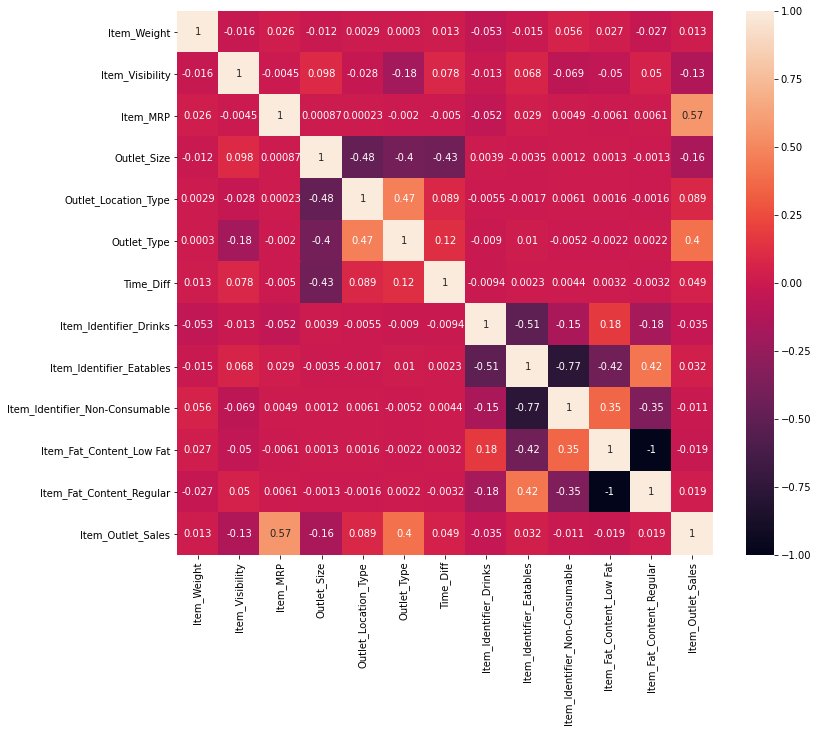

In [ ]:
fig,ax=plt.subplots(figsize=(12,10))
ax=sns.heatmap(norm_train.corr(),annot=True)

In [ ]:
features=['Item_Fat_Content_Regular','Item_Identifier_Eatables','Item_Identifier_Drinks','Outlet_Location_Type','Time_Diff','Item_MRP']
target=['Item_Outlet_Sales']

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(temp_X_train[features],temp_X_train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.score(temp_X_train[features],temp_X_train[target])

0.32554824767595403

In [ ]:
reg.score(temp_X_test[features],temp_X_test[target])

0.35956044072349946

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decs_reg=DecisionTreeRegressor(min_impurity_decrease=0.005,random_state=0)
decs_reg.fit(temp_X_train[features],temp_X_train[target])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.005, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
decs_reg.score(temp_X_train[features],temp_X_train[target])

0.9986131679467068

In [ ]:
decs_reg.score(temp_X_test[features],temp_X_test[target])

0.10541696080335117

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg=RandomForestRegressor(n_estimators=100)
rnd_reg.fit(temp_X_train[features],temp_X_train[target])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rnd_reg.score(temp_X_train[features],temp_X_train[target])

0.9288902637570429

In [ ]:
rnd_reg.score(temp_X_test[features],temp_X_test[target])

0.4473012362762936

In [ ]:
org_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Time_Diff,Item_Identifier_Drinks,Item_Identifier_Eatables,Item_Identifier_Non-Consumable,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,20.750,0.007565,107.8622,1,0,1,NaN,14,0,1,0,1,0
1,8.300,0.038428,87.3198,2,1,1,NaN,4,0,1,0,0,1
2,14.600,0.099575,241.7538,2,2,0,NaN,14,0,0,1,1,0
3,7.315,0.015388,155.0340,2,1,1,NaN,15,0,1,0,1,0
4,13.600,0.118599,234.2300,1,2,3,NaN,26,0,1,0,0,1


In [ ]:
X_test=org_test.drop(['Item_Outlet_Sales'],1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm_test=pd.DataFrame()
scaler=MinMaxScaler()
col=org_test.columns.drop('Item_Outlet_Sales',1)
scaled_values=scaler.fit_transform(org_test[col])
for i in range(len(col)):
    norm_test[col[i]]=scaled_values[:,i]
norm_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Time_Diff,Item_Identifier_Drinks,Item_Identifier_Eatables,Item_Identifier_Non-Consumable,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,0.964275,0.012415,0.323413,0.5,0.0,0.333333,0.416667,0.0,1.0,0.0,1.0,0.0
1,0.222983,0.108848,0.235849,1.0,0.5,0.333333,0.000000,0.0,1.0,0.0,0.0,1.0
2,0.598095,0.299905,0.894140,1.0,1.0,0.000000,0.416667,0.0,0.0,1.0,1.0,0.0
3,0.164335,0.036860,0.524488,1.0,0.5,0.333333,0.458333,0.0,1.0,0.0,1.0,0.0
4,0.538553,0.359348,0.862069,0.5,1.0,1.000000,0.916667,0.0,1.0,0.0,0.0,1.0


In [ ]:
y_pred_tree=decs_reg.predict(norm_test[features])
y_pred_tree

array([ 750.3566, 1406.1696,  731.0484, ..., 2502.7422, 6817.792 ,
        399.48  ])

In [ ]:
y_pred_rnd=rnd_reg.predict(norm_test[features])
y_pred_rnd

array([1158.551922, 1752.365626,  767.227972, ..., 2244.431774,
       4302.086674, 1036.497466])

In [ ]:
yt_pred_rnd=rnd_reg.predict(norm_train[features])
yt_pred_rnd

array([3797.583382,  494.443054, 2381.247016, ..., 1848.899968,
       1666.8303  , 1030.412054])

In [ ]:
cmp_df=pd.DataFrame(yt_pred_rnd,columns=['Predicted Train'])
cmp_df['Actual Train']=norm_train['Item_Outlet_Sales']
cmp_df[:10]

,Predicted Train,Actual Train
0,3797.583382,3735.1380
1,494.443054,443.4228
2,2381.247016,2097.2700
3,690.041778,732.3800
4,662.023804,994.7052
5,572.161888,556.6088
6,420.033246,343.5528
7,3477.773010,4022.7636
8,1210.457690,1076.5986
9,2473.007572,4710.5350


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(norm_train[target],yt_pred_rnd)**0.5

696.7913665760126

In [ ]:
from sklearn.model_selection import KFold
k_fold=KFold(n_splits=5,shuffle=False,random_state=0)
k_fold.split(norm_train[features],norm_train[target])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


<generator object _BaseKFold.split at 0x7f246b72cfc0>

In [ ]:
model_score_train=[]
for i,(train,value) in enumerate(k_fold.split(norm_train[features],norm_train[target])):
    rnd_reg.fit(norm_train.iloc[train],norm_train.iloc[train])
    model_score_train.append(rnd_reg.score(norm_train.iloc[train],norm_train.iloc[train]))
    print(rnd_reg.score(norm_train.iloc[train],norm_train.iloc[train]))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

0.9999557285001062


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

0.9999703255304159


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

0.9999731378098755


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

0.999953074310387
0.9999796500026472


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

In [ ]:
np.mean(model_score_train)

0.9999663832306863